In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 


In [69]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import colors

In [70]:
df = pd.read_csv("/Users/kosta/dtsc-2302-final-project/data/cleaned_data.csv", na_values = ['NA'])
df.dropna(inplace=True)
df.head()
df_dropall = df

In [71]:
df = pd.read_csv("/Users/kosta/dtsc-2302-final-project/data/cleaned_data.csv", na_values =  ['NA'])
df_original = df
df.head()

,NPA,Area-2020,Age_of_Residents-2021,Tree_Canopy-2012,Impervious_Surface-2023,Housing_Density-2023,Housing_Size-2023,Housing_Age-2023,New_Residential-2023,Residential_Renovation-2023,...,Neighborhood_Organizations-2021,Park_Proximity-2023,Job_Density-2019,Home_Sale_Price-2023,Natural_Gas_Consumption-2013,Fire_Call_Rate-2021,Fincancial_Services_Proximity-2023,Public_Health_Insurance -2017,Subsidized_Housing-2023,Residential_Demolitions-2023
0,2,-0.418097,-0.858584,0.599348,0.326066,0.157465,-0.586356,1.876569,-0.240473,0.264299,...,-0.811755,-0.207756,0.025873,0.049995,-0.602641,0.204785,-0.603198,-0.057741,0.201382,0.796587
1,3,0.557507,-0.588272,-0.513685,1.860837,2.768740,0.807002,2.053879,0.562732,0.941271,...,3.069993,0.791253,6.273766,0.708942,-0.056074,0.597797,1.819447,-0.778879,0.136022,-0.171605
2,4,-0.524497,0.776807,1.370966,0.154070,-0.588614,2.538766,0.398982,-0.196394,1.099232,...,-0.811755,-1.983175,-0.401501,3.754119,2.858951,0.222443,-0.901920,-1.179511,-0.335489,3.071840
3,5,-0.736605,-0.601787,-0.498335,0.129508,-0.168945,-1.259321,1.344637,1.223907,-0.525501,...,1.129119,1.053937,-0.228983,-0.810275,0.308304,0.106867,-0.779819,2.185799,-0.335489,0.941816
4,6,-0.427693,0.087510,-0.377192,0.500057,-0.215574,-1.123447,1.699258,-0.044569,0.061208,...,1.129119,0.432227,-0.189774,-0.107310,0.126115,0.739859,0.852878,1.785167,-0.335489,3.652756


In [72]:
rows_with_missing = df[df.isnull().any(axis=1)]

print(rows_with_missing)
print(rows_with_missing.info())

     NPA  Area-2020  Age_of_Residents-2021  Tree_Canopy-2012  \
2      4  -0.524497               0.776807          1.370966   
4      6  -0.427693               0.087510         -0.377192   
5      7  -0.238334               1.628292          0.566607   
7      9  -0.832882              -0.426084          0.860322   
8     10  -0.234006              -0.453115          0.030405   
..   ...        ...                    ...               ...   
450  472  -0.466691               2.020246          0.160014   
451  473  -0.308317               0.884933          0.121910   
452  474  -0.325302               0.817354         -0.310995   
453  475   0.282897               2.033762          0.987824   
454  476   0.839945              -0.993741          2.244415   

     Impervious_Surface-2023  Housing_Density-2023  Housing_Size-2023  \
2                   0.154070             -0.588614           2.538766   
4                   0.500057             -0.215574          -1.123447   
5           

In [73]:
df.dropna(subset=['Age_of_Residents-2021'], inplace=True)
df_filtered1=df


In [74]:
rows_with_missing = df[df.isnull().any(axis=1)]

print(rows_with_missing)
print(rows_with_missing.info())

     NPA  Area-2020  Age_of_Residents-2021  Tree_Canopy-2012  \
2      4  -0.524497               0.776807          1.370966   
4      6  -0.427693               0.087510         -0.377192   
5      7  -0.238334               1.628292          0.566607   
7      9  -0.832882              -0.426084          0.860322   
8     10  -0.234006              -0.453115          0.030405   
..   ...        ...                    ...               ...   
450  472  -0.466691               2.020246          0.160014   
451  473  -0.308317               0.884933          0.121910   
452  474  -0.325302               0.817354         -0.310995   
453  475   0.282897               2.033762          0.987824   
454  476   0.839945              -0.993741          2.244415   

     Impervious_Surface-2023  Housing_Density-2023  Housing_Size-2023  \
2                   0.154070             -0.588614           2.538766   
4                   0.500057             -0.215574          -1.123447   
5           

In [75]:
housing = df_dropall[df_dropall['Residential_Demolitions-2023'] == 'Residential_Demolitions-2023']
housing_with_missing = rows_with_missing[rows_with_missing['Residential_Demolitions-2023'] == 'Residential_Demolitions']
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NPA                                  0 non-null      int64  
 1   Area-2020                            0 non-null      float64
 2   Age_of_Residents-2021                0 non-null      float64
 3   Tree_Canopy-2012                     0 non-null      float64
 4   Impervious_Surface-2023              0 non-null      float64
 5   Housing_Density-2023                 0 non-null      float64
 6   Housing_Size-2023                    0 non-null      float64
 7   Housing_Age-2023                     0 non-null      float64
 8   New_Residential-2023                 0 non-null      float64
 9   Residential_Renovation-2023          0 non-null      float64
 10  Commuters_Driving_Alone-2022         0 non-null      float64
 11  Vacant_Land-2023                     0 non-null  

In [76]:
print(df.isnull().sum())

NPA                                     0
Area-2020                               0
Age_of_Residents-2021                   0
Tree_Canopy-2012                        0
Impervious_Surface-2023                 0
                                     ... 
Fire_Call_Rate-2021                     0
Fincancial_Services_Proximity-2023    169
Public_Health_Insurance -2017           6
Subsidized_Housing-2023                 0
Residential_Demolitions-2023            1
Length: 77, dtype: int64


In [77]:
test_data = df[df[target].isna()].copy()

X_test = test_data[predictors]

X_test_cleaned = X_test.dropna(how='all')

if X_test_cleaned.empty:
    print("No rows left in X_test with valid predictor values.")
else:
    X_test_imputed = imputer.transform(X_test_cleaned)

    X_test_scaled = scaler.transform(X_test_imputed)

    predicted_knn = knn.predict(X_test_scaled)

    df.loc[X_test_cleaned.index, target] = predicted_knn

    print("Imputation and prediction completed successfully.")


No rows left in X_test with valid predictor values.


In [78]:
print(housing_with_missing)

Empty DataFrame
Columns: [NPA, Area-2020, Age_of_Residents-2021, Tree_Canopy-2012, Impervious_Surface-2023, Housing_Density-2023, Housing_Size-2023, Housing_Age-2023, New_Residential-2023, Residential_Renovation-2023, Commuters_Driving_Alone-2022, Vacant_Land-2023, Youth_Population-2022, Older_Adult_Population-2022, White_Population-2020, Black_Population-2020, Asian_Population-2020, All_Other_Races-2020, Hispanic_Latino-2020, Commercial_Construction-2023, Bachelors_Degree-2022, Early_Care_Proximity-2023, School_Age_Proximity-2023, Recycling_Participation-2022, Solid_Waste-2022, Solid_Waste_Diversion_Rate-2022, Electricity_Consumption-2013, Water_Consumption-2022, Low_Cost_Healthcare_Proximity-2022, Home_Ownership-2022, Single_Family_Housing-2023, Residential_Occupancy-2022, Nuisance_Violations-2022, Long_Commute -2022, Bicycle_Friendliness-2023, Street_Connectivity-2022, Transit_Proximity-2023, Household_Income-2021, Employment_Rate-2022, High_School_Diploma-2022, Rental_Costs-2021, C

In [79]:
df.to_csv("/Users/kosta/dtsc-2302-final-project/data/cleaned_data.csv", index=False)
df.to_csv('output_data.csv', index=False)  


In [80]:
import pandas as pd 
df = pd.read_csv("/Users/kosta/dtsc-2302-final-project/data/cleaned_data.csv", na_values=['NA'])

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NPA                                  455 non-null    int64  
 1   Area-2020                            455 non-null    float64
 2   Age_of_Residents-2021                455 non-null    float64
 3   Tree_Canopy-2012                     455 non-null    float64
 4   Impervious_Surface-2023              455 non-null    float64
 5   Housing_Density-2023                 455 non-null    float64
 6   Housing_Size-2023                    442 non-null    float64
 7   Housing_Age-2023                     442 non-null    float64
 8   New_Residential-2023                 455 non-null    float64
 9   Residential_Renovation-2023          455 non-null    float64
 10  Commuters_Driving_Alone-2022         455 non-null    float64
 11  Vacant_Land-2023                

NPA                                     0
Area-2020                               0
Age_of_Residents-2021                   0
Tree_Canopy-2012                        0
Impervious_Surface-2023                 0
                                     ... 
Fire_Call_Rate-2021                     0
Fincancial_Services_Proximity-2023    169
Public_Health_Insurance -2017           6
Subsidized_Housing-2023                 0
Residential_Demolitions-2023            1
Length: 77, dtype: int64

In [81]:
print(df.columns.tolist())

['NPA', 'Area-2020', 'Age_of_Residents-2021', 'Tree_Canopy-2012', 'Impervious_Surface-2023', 'Housing_Density-2023', 'Housing_Size-2023', 'Housing_Age-2023', 'New_Residential-2023', 'Residential_Renovation-2023', 'Commuters_Driving_Alone-2022', 'Vacant_Land-2023', 'Youth_Population-2022', 'Older_Adult_Population-2022', 'White_Population-2020', 'Black_Population-2020', 'Asian_Population-2020', 'All_Other_Races-2020', 'Hispanic_Latino-2020', 'Commercial_Construction-2023', 'Bachelors_Degree-2022', 'Early_Care_Proximity-2023', 'School_Age_Proximity-2023', 'Recycling_Participation-2022', 'Solid_Waste-2022', 'Solid_Waste_Diversion_Rate-2022', 'Electricity_Consumption-2013', 'Water_Consumption-2022', 'Low_Cost_Healthcare_Proximity-2022', 'Home_Ownership-2022', 'Single_Family_Housing-2023', 'Residential_Occupancy-2022', 'Nuisance_Violations-2022', 'Long_Commute -2022', 'Bicycle_Friendliness-2023', 'Street_Connectivity-2022', 'Transit_Proximity-2023', 'Household_Income-2021', 'Employment_Rate-

In [82]:
df = df.dropna(subset=['Home_Sale_Price-2023', 'Housing_Size-2023', 'Rental_Costs-2021', 'Housing_Density-2023'])

df['Single_Family_Housing-2023'] = df['Neighborhood_Organizations-2021'].apply(lambda x: 1 if x >= 4 else 0)


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_reg = df[['Housing_Violations-2023', 'Housing_Size-2023', 'Rental_Costs-2021', 'Housing_Density-2023']]
y_reg = df['Home_Sale_Price-2023']

X_reg_imputed = pd.DataFrame(imputer.fit_transform(X_reg), columns = X_reg.columns)

X_reg_imputed.reset_index(drop=True, inplace=True)
y_reg.reset_index(drop=True, inplace=True)

valid_rows = y_reg.notna()
X_reg_final = X_reg_imputed[valid_rows]
y_reg_final = y_reg[valid_rows]

X_train, X_test, y_train, y_test = train_test_split(X_reg_final, y_reg_final, test_size=0.2, random_state = 42)

Linear Regression
  RMSE: 0.72
  R² Score: -0.003

kNN Regression
  RMSE: 0.82
  R² Score: -0.305

Random Forest
  RMSE: 0.77
  R² Score: -0.148



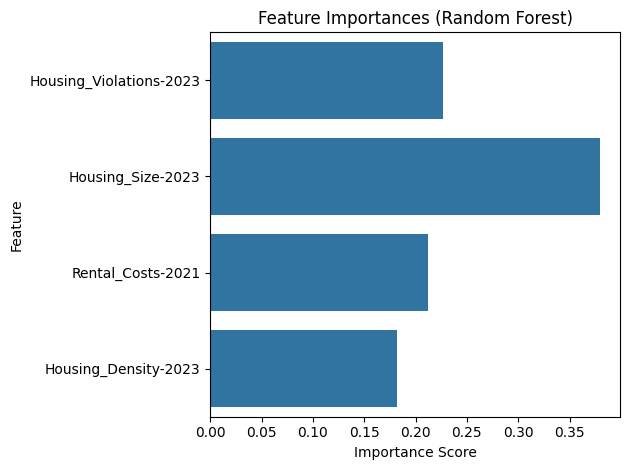

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

models = {
    "Linear Regression": y_pred_lr,
    "kNN Regression": y_pred_knn,
    "Random Forest": y_pred_rf
}

for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Manually take square root
    r2 = r2_score(y_test, y_pred)
    print(f"{name}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.3f}\n")
    import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = X_train.columns

sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Logistic Regression
  Accuracy: 1.00
  ROC AUC: nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

kNN Classifier
  Accuracy: 1.00
  ROC AUC: nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Random Forest Classifier
  Accuracy: 1.00
  ROC AUC: nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


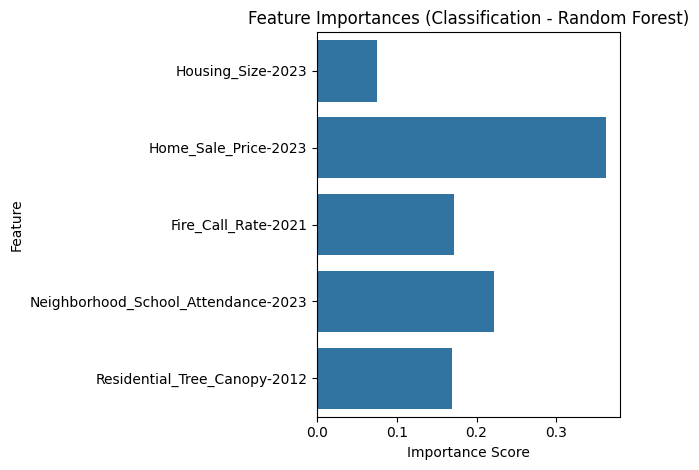

In [85]:
df['Single_Family_Housing-2023'] = df['Neighborhood_Organizations-2021'].apply(lambda x: 1 if x >= 4 else 0)

features_clf = [
    'Housing_Size-2023',
    'Home_Sale_Price-2023',
    'Fire_Call_Rate-2021',
    'Neighborhood_School_Attendance-2023',
    'Residential_Tree_Canopy-2012'
]

X_clf = df[features_clf]
y_clf = df['Single_Family_Housing-2023']

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_clf_imputed = pd.DataFrame(imputer.fit_transform(X_clf), columns=X_clf.columns)

X_clf_imputed.reset_index(drop=True, inplace=True)
y_clf.reset_index(drop=True, inplace=True)

valid_rows = y_clf.notna()
X_clf_final = X_clf_imputed[valid_rows]
y_clf_final = y_clf[valid_rows]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clf_final, y_clf_final, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


models = {
    "Logistic Regression": y_pred_log,
    "kNN Classifier": y_pred_knn,
    "Random Forest Classifier": y_pred_rf
}

for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{name}")
    print(f"  Accuracy: {acc:.2f}")
    print(f"  ROC AUC: {auc:.2f}")
    print(classification_report(y_test, y_pred))

    import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_clf.feature_importances_
sns.barplot(x=importances, y=X_train.columns)
plt.title('Feature Importances (Classification - Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [87]:
df.to_csv("/Users/kosta/Downloads/imputation.csv")

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

import statsmodels.api as sm 

In [96]:
def specificity_score(y_true, y_pred):
    true_negatives = sum((y_true == 0) & (y_pred==0))
    false_positives = sum ((y_true == 0) & (y_pred==1))

    if (true_negatives + false_positives) == 0:
        return 0.0
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity
    

In [90]:
housing = pd.read_csv("/Users/kosta/Downloads/imputation.csv")
housing.dropna(inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 318
Data columns (total 78 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           86 non-null     int64  
 1   NPA                                  86 non-null     int64  
 2   Area-2020                            86 non-null     float64
 3   Age_of_Residents-2021                86 non-null     float64
 4   Tree_Canopy-2012                     86 non-null     float64
 5   Impervious_Surface-2023              86 non-null     float64
 6   Housing_Density-2023                 86 non-null     float64
 7   Housing_Size-2023                    86 non-null     float64
 8   Housing_Age-2023                     86 non-null     float64
 9   New_Residential-2023                 86 non-null     float64
 10  Residential_Renovation-2023          86 non-null     float64
 11  Commuters_Driving_Alone-2022         8

In [97]:
housing['Single_Family_Housing-2023'] = housing['Single_Family_Housing-2023']-housing['Single_Family_Housing-2023'].mean()

housing_X = housing[['Housing_Size-2023', 'Single_Family_Housing-2023', 'Home_Sale_Price-2023', 'Fire_Call_Rate-2021', 'Neighborhood_School_Attendance-2023', 'Residential_Tree_Canopy-2012']]
housing_X = sm.add_constant(housing_X)

housing_y = housing['Neighborhood_Organizations-2021']
model2_sm = sm.Logit(housing_y, housing_X).fit()

print(model2_sm.summary())

ValueError: endog must be in the unit interval.